In [1]:
# data analysis 
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.000,NaN,S
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.850,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.000,B28,NaN
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C


In [6]:
train.info()
print('*'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

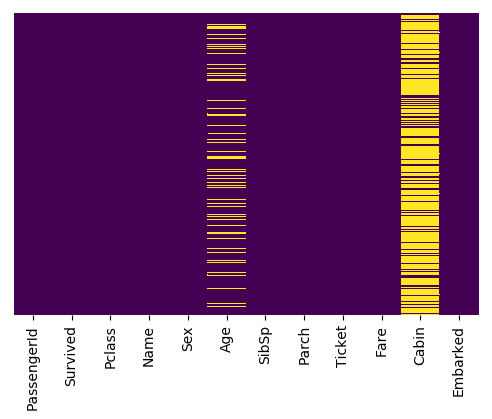

In [7]:
# Missing Data Visualization for training data
plt.figure(dpi=100)
sns.heatmap(train.isnull(), cmap='viridis',yticklabels=False, cbar=False)

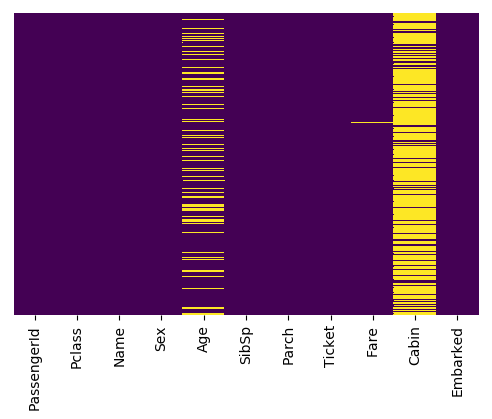

In [8]:
# Missing Data Visualization for testing data
plt.figure(dpi=100)
sns.heatmap(test.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Herman, Mrs. Samuel (Jane Laver)",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train[['Sex', 'Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


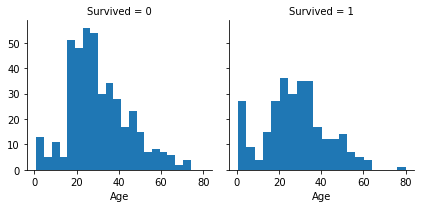

In [14]:
g=sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age',bins=20)

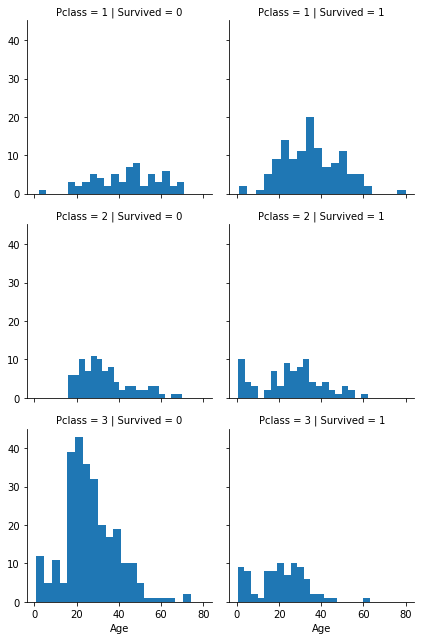

In [15]:
g = sns.FacetGrid(train, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=20)

C:\Users\mjahandi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\mjahandi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


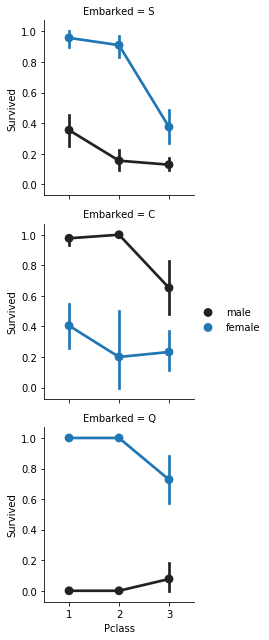

In [16]:
g= sns.FacetGrid(train, row='Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex' )
g.add_legend()

C:\Users\mjahandi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


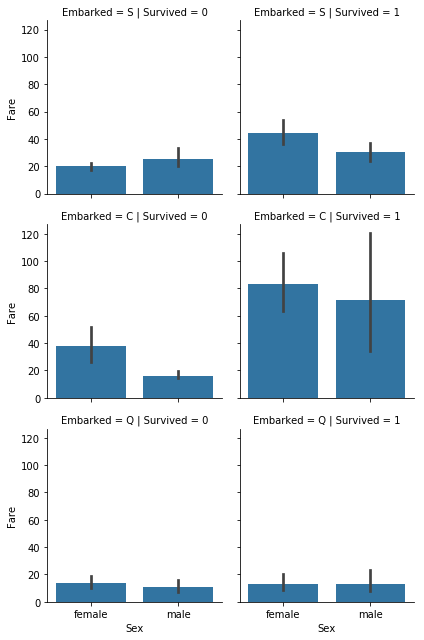

In [17]:
g = sns.FacetGrid(train, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare')


In [18]:
# dropping 'Ticket' and 'Cabin' features
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [21]:
test.shape

(418, 9)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [56]:
#  dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [57]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [59]:
train = train.drop('Name', axis=1)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [61]:

test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [62]:
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [64]:
test = test.drop('Name', axis=1)

In [65]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs


In [70]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [73]:
train = train.drop('PassengerId', axis=1)

In [74]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [76]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,3
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3


In [77]:
train['Sex'] = train['Sex'].map({'female':1, 'male':0}).astype(int)


In [78]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [79]:
test['Sex'] = test['Sex'].map({'female':1, 'male':0}).astype(int)

In [80]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 59.2+ KB


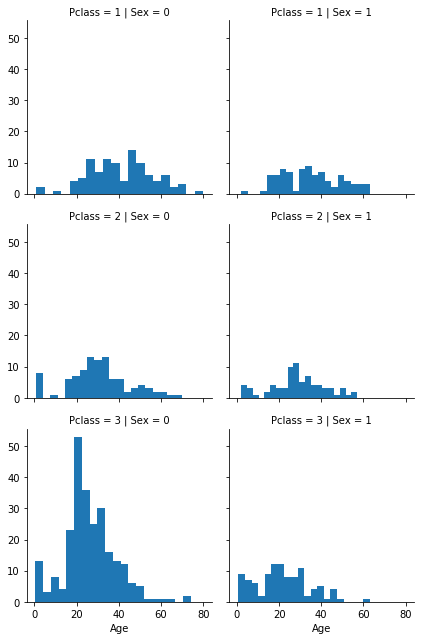

In [91]:
g = sns.FacetGrid(train, row='Pclass', col= 'Sex')
g.map(plt.hist, 'Age', bins=20)

In [97]:
#filling Age with the median values for different Sexes and Pclasses
train.groupby(['Sex', 'Pclass']).median()

Survived   Age  SibSp  Parch      Fare  Title
Sex Pclass                                               
0   1            0.0  40.0    0.0    0.0  41.26250    1.0
    2            0.0  30.0    0.0    0.0  13.00000    1.0
    3            0.0  25.0    0.0    0.0   7.92500    1.0
1   1            1.0  35.0    0.0    0.0  82.66455    2.0
    2            1.0  28.0    0.0    0.0  22.00000    3.0
    3            0.5  21.5    0.0    0.0  12.47500    2.0

In [105]:
train.loc[(train['Age'].isnull()) & (train['Sex']==0) & (train['Pclass']==1), 'Age'] = 40
train.loc[(train['Age'].isnull()) & (train['Sex']==0) & (train['Pclass']==2), 'Age'] = 30
train.loc[(train['Age'].isnull()) & (train['Sex']==0) & (train['Pclass']==3), 'Age'] = 25
train.loc[(train['Age'].isnull()) & (train['Sex']==1) & (train['Pclass']==1), 'Age'] = 35
train.loc[(train['Age'].isnull()) & (train['Sex']==1) & (train['Pclass']==2), 'Age'] = 28
train.loc[(train['Age'].isnull()) & (train['Sex']==1) & (train['Pclass']==3), 'Age'] = 21.5

In [108]:
test.groupby(['Sex', 'Pclass']).median()

PassengerId   Age  SibSp  Parch      Fare  Title
Sex Pclass                                                  
0   1            1094.0  42.0    0.0    0.0  51.86250    1.0
    2            1122.0  28.0    0.0    0.0  13.00000    1.0
    3            1102.5  24.0    0.0    0.0   7.89580    1.0
1   1            1088.0  41.0    0.0    0.0  79.02500    3.0
    2            1122.0  24.0    0.0    0.0  26.00000    2.0
    3            1070.5  22.0    0.0    0.0   8.08125    2.0

In [109]:
test.loc[(test['Age'].isnull()) & (test['Sex']==0) & (test['Pclass']==1), 'Age'] = 42
test.loc[(test['Age'].isnull()) & (test['Sex']==0) & (test['Pclass']==2), 'Age'] = 28
test.loc[(test['Age'].isnull()) & (test['Sex']==0) & (test['Pclass']==3), 'Age'] = 24
test.loc[(test['Age'].isnull()) & (test['Sex']==1) & (test['Pclass']==1), 'Age'] = 41
test.loc[(test['Age'].isnull()) & (test['Sex']==1) & (test['Pclass']==2), 'Age'] = 24
test.loc[(test['Age'].isnull()) & (test['Sex']==1) & (test['Pclass']==3), 'Age'] = 22

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 59.2+ KB


In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 27.8+ KB


In [125]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
3,"(48.168, 64.084]",0.434783
2,"(32.252, 48.168]",0.412844
1,"(16.336, 32.252]",0.336714
4,"(64.084, 80.0]",0.090909


In [126]:
# Replacing Age wiht AgeBands?

In [128]:
train= train.drop('AgeBand', axis=1)

In [130]:
# Creating new features

In [140]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])    

In [142]:
test['Embarked']=test['Embarked'].fillna(test['Embarked'].mode()[0])

In [146]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [147]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [150]:
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [152]:
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [153]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,1
1,893,3,1,47.0,1,0,7.0000,0,3
2,894,2,0,62.0,0,0,9.6875,2,1
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,3


In [156]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [158]:
train.info()
print('*'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
Title       891 non-null int64
dtypes: float64(2), int32(1), int64(6)
memory usage: 59.2 KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int32(1), int64(6)
memory usage: 27.8 KB


In [159]:
# Models

In [244]:
X = train.drop('Survived', axis=1)
y = train['Survived']
test_wo_PassId = test.drop('PassengerId', axis=1).copy() # test without the passengerId

In [245]:
test_wo_PassId.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,2,1
1,3,1,47.0,1,0,7.0000,0,3
2,2,0,62.0,0,0,9.6875,2,1
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,3


In [239]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Scaling

In [262]:
# before scaling
train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
539,1,1,1,22.0,0,2,49.5000,1,2
237,1,2,1,8.0,0,2,26.2500,0,2
638,0,3,1,41.0,0,5,39.6875,0,3
358,1,3,1,21.5,0,0,7.8792,2,2
379,0,3,0,19.0,0,0,7.7750,0,1


In [249]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

test_wo_PassId = sc.fit_transform(test_wo_PassId)


In [ ]:
# After scaling
## saving the feature names for decision tree display
column_names = X.columns

# Data Modeling

In [309]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

C:\Users\mjahandi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [314]:
# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred_logreg)}')
print('*' * 60)
print(classification_report(y_test,y_pred_logreg))



Confusion matrix: 
 [[149  26]
 [ 32  88]]
************************************************************
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       175
           1       0.77      0.73      0.75       120

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



# Using Cross-validation

In [316]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.


X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print (f"Cross-Validation accuracy scores:{accuracies}")
print (f"Mean Cross-Validation accuracy score: {round(accuracies.mean(),5)}")

Cross-Validation accuracy scores:[0.8206278  0.8206278  0.8206278  0.84753363 0.81165919 0.79820628
 0.78475336 0.85650224 0.80717489 0.82511211]
Mean Cross-Validation accuracy score: 0.81928


# Grid Search on Logistic Regression

In [265]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv)
## Fitting the model
grid.fit(X, y)

C:\Users\mjahandi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'pen

In [267]:
## Getting the best parameters. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.820627802690583
{'C': 0.5, 'penalty': 'l2'}
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [268]:
### Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
y_pred_logreg_grid = logreg_grid.predict(test_wo_PassId)

In [270]:
logreg_grid_submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred_logreg_grid
})

In [272]:
logreg_grid_submission.to_csv('./Outputs/logreg_grid.csv',index=False)

# Support Vector Machines(SVM)

In [273]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [274]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8380597014925373
{'C': 2, 'gamma': 0.1}
SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [275]:
# using the best found hyper paremeters
svm_grid = grid_search.best_estimator_
y_pred_svm_grid = svm_grid.predict(test_wo_PassId)

In [277]:
svm_grid_submission = pd.DataFrame({
   'PassengerId': test['PassengerId'],
    'Survived': y_pred_svm_grid
})

In [278]:
svm_grid_submission.to_csv('./Outputs/svm_grid.csv', index=False)

# KNN

In [279]:
## Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.8161435  0.76681614 0.79820628 0.80269058 0.8161435  0.79372197
 0.77130045 0.82511211 0.82511211 0.80269058]
Mean Cross-Validation accuracy score: 0.802


In [280]:
# Grid Search

from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [281]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8335820895522388
{'n_neighbors': 14, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')


In [282]:
### Using the best parameters from the grid-search.
knn_grid= grid.best_estimator_
y_pred_knn_grid = knn_grid.predict(test_wo_PassId)

In [283]:
knn_grid_sub = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived': y_pred_knn_grid
})

In [284]:
knn_grid_sub.to_csv('./Outputs/knn_grid.csv', index=False)

# Gaussian Naive Bayes

In [ ]:

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gaussian = gaussian.predict(test_wo_PassId)

In [ ]:
gaussian_sub = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived': y_pred_gaussian
})

In [198]:
gaussian_sub.to_csv('./Outputs/gaussian.csv', index=False)

# Decision Tree Classifier

In [290]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
#max_feature = [21.0,22.0,23.0,24.0,25.0,26.0]
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y) 

C:\Users\mjahandi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
        

In [291]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 4}
0.8338945005611672
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [292]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters 
y_pred_dectree_grid =  dectree_grid.predict(test_wo_PassId)

In [293]:
dectree_grid_sub = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived': y_pred_dectree_grid
})

dectree_grid_sub.to_csv('./Outputs/dectree_grid_sub.csv', index=False)

# Random Forest Classifier

In [294]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              ran

In [295]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8436567164179104
{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 160}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [297]:
rf_grid = grid.best_estimator_
y_pred_rf_grid = rf_grid.predict(test_wo_PassId)

In [298]:
rf_grid_sub = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived': y_pred_rf_grid
})

rf_grid_sub.to_csv('./Outputs/rf_grid.csv', index=False)

# Bagging Classifier

In [299]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [300]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8223880597014925
{'n_estimators': 180}
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=180,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [301]:
bagging_grid = grid.best_estimator_
bagging_grid.score(X,y)

0.9831649831649831

In [302]:
y_pred_bagging_grid = bagging_grid.predict(test_wo_PassId)


In [303]:
bagging_grid_sub = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived': y_pred_bagging_grid
})

bagging_grid_sub.to_csv('./Outputs/bagging_grid.csv', index=False)

# Perceptron

In [206]:
from sklearn.linear_model import Perceptron

In [207]:
perceptron = Perceptron()

In [208]:
perceptron.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [209]:
y_pred_perceptron = perceptron.predict(X_test)

In [210]:
perceptron_sub = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived': y_pred_perceptron
})

In [211]:
perceptron_sub.to_csv('./Outputs/perceptron.csv', index=False)

In [213]:
# Linear SVC
from sklearn.svm import LinearSVC

In [214]:
linear_svc = LinearSVC()

In [215]:
linear_svc.fit(X_train, y_train)
y_pred_linear_svc = linear_svc.predict(X_test)

C:\Users\mjahandi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [216]:
linear_svc_sub = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived': y_pred_linear_svc
})

In [217]:
linear_svc_sub.to_csv('./Outputs/linear_svc.csv', index=False)

In [218]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

In [219]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

In [220]:
sgd_sub = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived': y_pred_sgd
})

sgd_sub.to_csv('./Outputs/sgd.csv', index=False)

In [234]:
from sklearn.metrics import confusion_matrix, classification_report

In [233]:
print(confusion_matrix(y_test_1,grid_predictions))

[[157  18]
 [ 38  82]]


In [235]:
print(classification_report(y_test_1,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       175
           1       0.82      0.68      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295

